In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
!pip install pandas

  Using cached pandas-2.2.2-cp39-cp39-win_amd64.whl (11.6 MB)
  Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)
  Using cached numpy-2.0.1-cp39-cp39-win_amd64.whl (16.6 MB)


You should consider upgrading via the 'c:\users\userpc\workspace\titanic\scripts\python.exe -m pip install --upgrade pip' command.


In [4]:
!pip install seaborn

You should consider upgrading via the 'c:\users\userpc\workspace\titanic\scripts\python.exe -m pip install --upgrade pip' command.


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.rc('font',family='Malgun Gothic')

In [3]:
df0 = pd.read_csv("../section7/data/titanic/train.csv")
test = pd.read_csv("../section7/data/titanic/test.csv")
# submission = pd.read_csv("../section7/data/titanic/gender_submission.csv")

In [ ]:
df0

In [7]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df0.describe()

In [ ]:
df0.head(3)

In [ ]:
df0.tail(3)

In [8]:
df0.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
df0["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: ylabel='count'>

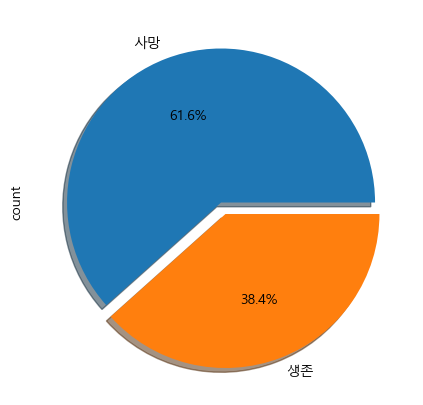

In [71]:
plt.figure(figsize=(5,5))
labels = ["사망","생존"]
df0["Survived"].value_counts().plot.pie(explode=[0,0.08],
                                        shadow=True,
                                        autopct="%.1f%%",
                                        labels=labels)

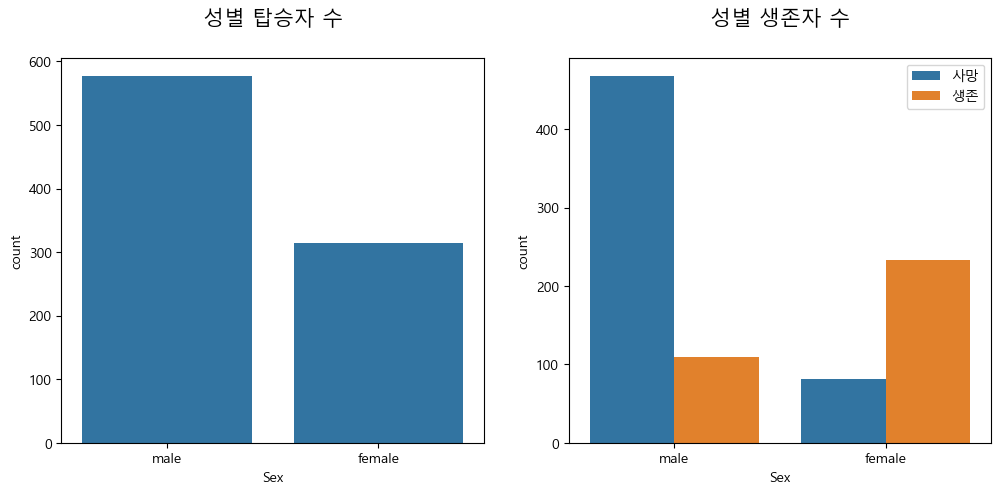

In [12]:
figure,axes = plt.subplots(1,2,figsize=(12,5))

axes[0].set_title("성별 탑승자 수\n",size=15)
sns.countplot(x="Sex",data=df0,ax=axes[0])

axes[1].set_title("성별 생존자 수\n",size=15)
sns.countplot(x="Sex",hue="Survived",data=df0,ax=axes[1])
axes[1].legend(labels=['사망', '생존'])

In [35]:
df0[["Pclass","Survived"]].groupby("Pclass").mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


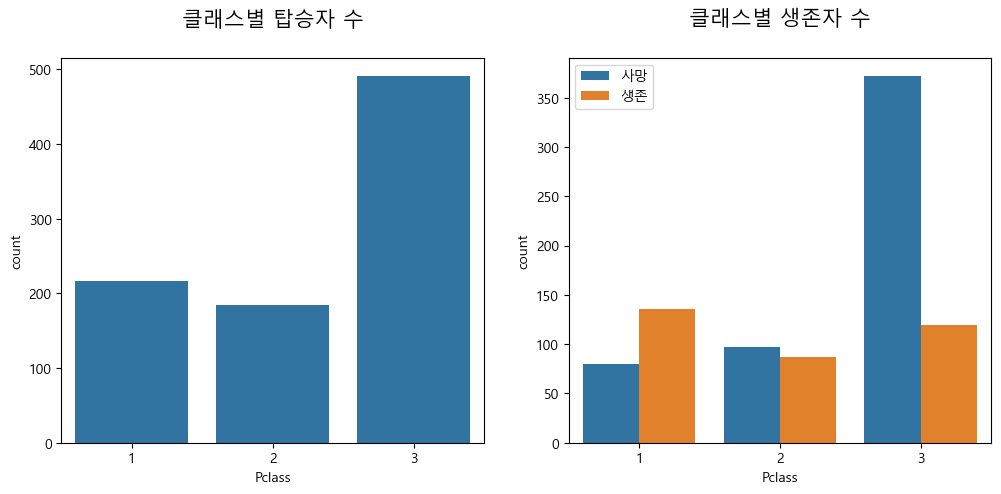

In [42]:
figure,axes = plt.subplots(1,2,figsize=(12,5))

axes[0].set_title("클래스별 탑승자 수\n",size=15)
sns.countplot(x="Pclass",data=df0,ax=axes[0])

axes[1].set_title("클래스별 생존자 수\n",size=15)
sns.countplot(x="Pclass",hue="Survived",data=df0,ax=axes[1])
axes[1].legend(labels=['사망', '생존'])

In [56]:
df0["Age"].mean()

np.float64(29.69911764705882)

In [55]:
df0["Age"].isnull().sum()

np.int64(177)

C:\Users\userpc\AppData\Local\Temp\ipykernel_16820\2008319314.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df0["Age"],bins=25)


<Axes: xlabel='Age', ylabel='Density'>

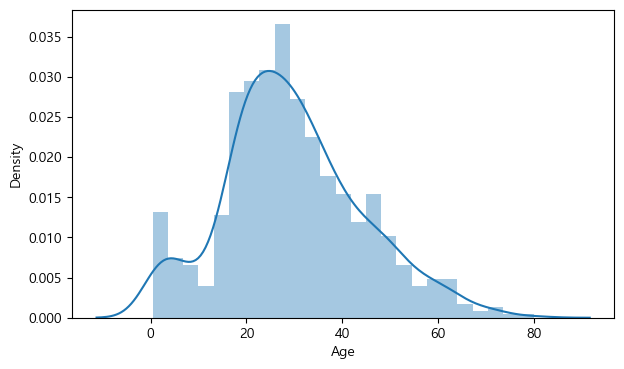

In [72]:
plt.figure(figsize=(7,4))
sns.distplot(df0["Age"],bins=25)

In [73]:
# SibSp = siblings & spouses
# Parch = parents & children

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

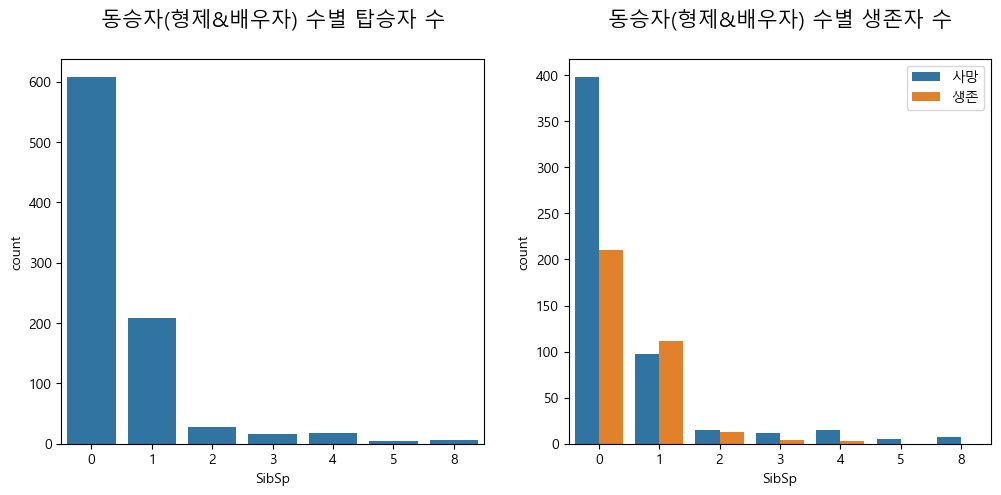

In [79]:
figure,axes = plt.subplots(1,2,figsize=(12,5))

axes[0].set_title("동승자(형제&배우자) 수별 탑승자 수\n",size=15)
sns.countplot(x="SibSp",data=df0,ax=axes[0])

axes[1].set_title("동승자(형제&배우자) 수별 생존자 수\n",size=15)
sns.countplot(x="SibSp",hue="Survived",data=df0,ax=axes[1])
axes[1].legend(labels=['사망', '생존'])

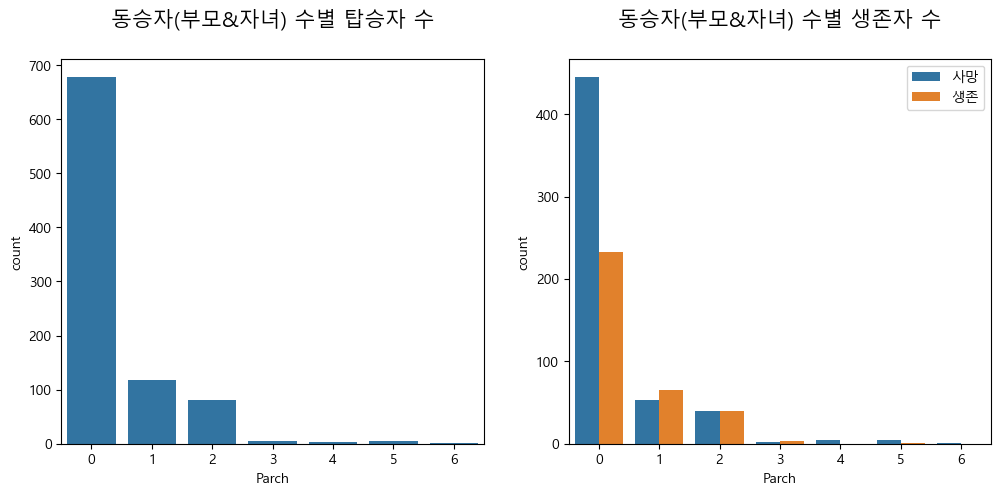

In [80]:
figure,axes = plt.subplots(1,2,figsize=(12,5))

axes[0].set_title("동승자(부모&자녀) 수별 탑승자 수\n",size=15)
sns.countplot(x="Parch",data=df0,ax=axes[0])

axes[1].set_title("동승자(부모&자녀) 수별 생존자 수\n",size=15)
sns.countplot(x="Parch",hue="Survived",data=df0,ax=axes[1])
axes[1].legend(labels=['사망', '생존'])

In [86]:
df0[["SibSp","Survived"]].groupby("SibSp").mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [87]:
df0[["Parch","Survived"]].groupby("Parch").mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [ ]:
# Embarked = mounted from C(Cherbourg),Ｑ(Queenstown),S(Southampton)
# route is from Queenstown to Cherbourg then Southampton

In [101]:
df0[["Embarked","Survived"]].groupby("Embarked").mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957
